In [1]:
import os
import sys
home_dir = "../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import pydna_epbd.pickle_utils as pickle_utils
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# root = "/usr/projects/pyDNA_EPBD/pyDNA_EPBD_inputs_outputs/"
# simulation_inps_dir = root+"data/88_sequences/"
# simulation_outs_dir = root+"outputs_simulation/88seqs_100iters/88_sequences/"
# p5_wt_path = simulation_outs_dir+f"12.pkl" # P5_wt
# p5_mt_path = simulation_outs_dir+f"13.pkl" # P5_mt


simulation_inps_dir = home_dir+"examples/p5/p5_seqs/"
simulation_outs_dir = home_dir+"outputs/p5_wt_mt/"
p5_wt_path = simulation_outs_dir+f"P5_wt.pkl"
p5_mt_path = simulation_outs_dir+f"P5_mt.pkl"

bubble1 = pickle_utils.load_pickle(p5_wt_path)["bubbles"]
bubble2 = pickle_utils.load_pickle(p5_mt_path)["bubbles"]
bubble1.shape, bubble2.shape

((77, 20, 20), (77, 20, 20))

In [9]:
wt_prob = bubble1/80000
mt_prob = bubble2/80000

(77, 20) (77, 20)
(slice(None, None, None), slice(3, 15, None))
(77, 12) (77, 12)
(924,) (924,)
(100, 100) (100, 100)
(77, 12) (924,) (100, 100)
(77, 12) (924,) (100, 100)
(77, 12) (924,) (100, 100)
(77, 12) (924,) (100, 100)
(77, 12) (924,) (100, 100)
(77, 12) (924,) (100, 100)
(77, 12) (924,) (100, 100)
(77, 12) (924,) (100, 100)


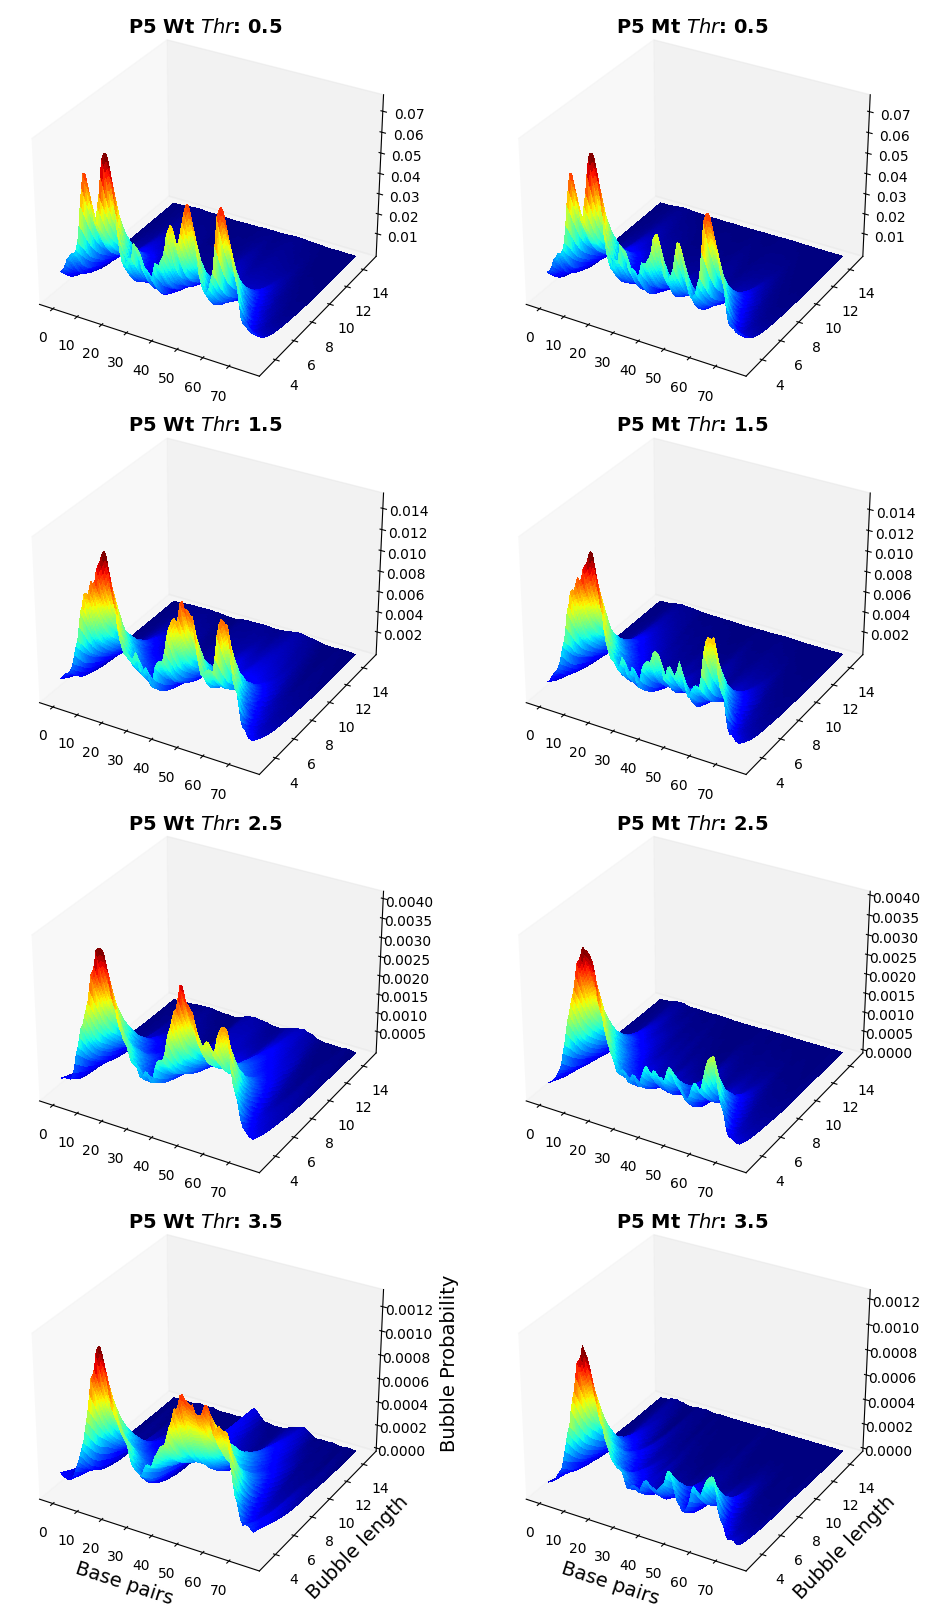

In [11]:
from scipy.interpolate import griddata
from matplotlib import cm

x = np.linspace(0, 76, 77)  # x-axis: for bps
y = np.linspace(0, 20, 20)  # y-axis: bubble length
x, y = np.meshgrid(x, y, indexing="ij") # original xy grid, will do interpolation later for each slice
print(x.shape, y.shape)

region = np.s_[:, 3:15]
print(region)
x, y = x[region], y[region]
print(x.shape, y.shape)

xf, yf = x.flatten(), y.flatten()
print(xf.shape, yf.shape)

# Creating the new x, y, z coordinates for interpolation
xnew = np.linspace(x.min(), x.max(), 100)
ynew = np.linspace(y.min(), y.max(), 100)
Xnew, Ynew = np.meshgrid(xnew, ynew)
print(Xnew.shape, Ynew.shape)


min_bubble_length_index = np.argmin(np.abs(ynew - 3))
# The indices for the base pairs <50-51> in the new grid
bp_indices = np.where((xnew >= 50) & (xnew <= 51))[0]

def getznew(probability_tensor, th_idx):
    z = probability_tensor[:, :, th_idx] # idx:th, 0:.5, 2:1.5, 4:2.5, 6:3.5
    z = z[region]
    zf = z.flatten()
    # Creating the new x, y, z coordinates for interpolation
    Znew = griddata((xf, yf), zf, (Xnew, Ynew), method='cubic')
    print(z.shape, zf.shape, Znew.shape)
    return Znew

TRESHOLDS = [i/10 for i in range(5, 105, 5)] # start=.5, end=10.5, step.5

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(11, 16), subplot_kw=dict(projection='3d')) #  sharex="col", sharey="col",
fig.tight_layout(pad =.5)
fontsize = 14

for i in range(4):
    idx = i*2
    th = TRESHOLDS[idx]

    wt_Znew = getznew(wt_prob, idx)
    mt_Znew = getznew(mt_prob, idx)

    ax0 = axs[i, 0]
    ax0.plot_surface(Xnew, Ynew, wt_Znew, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)#, shade=True)
    ax0.set_title(f"P5 Wt $Thr$: {th}", fontsize=fontsize, fontweight='bold', y=1)
    ax0.grid(False)
    
    # ax.view_init(10, 120)

    ax1 = axs[i, 1]
    ax1.plot_surface(Xnew, Ynew, mt_Znew, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)#, shade=True)
    ax1.set_title(f"P5 Mt $Thr$: {th}", fontsize=fontsize, fontweight='bold', y=1)
    ax1.grid(False)
    
    # not getting the proper bars
    # bar_heights0 = mt_Znew[min_bubble_length_index, bp_indices]
    # bar_heights1 = mt_Znew[min_bubble_length_index, bp_indices]
    # for j in range(len(bp_indices)):
    #     ax0.bar3d(xnew[bp_indices[j]], ynew[min_bubble_length_index], 0, 1, 1, bar_heights0[j], color='red', alpha=0.3) 
    #     ax1.bar3d(xnew[bp_indices[j]], ynew[min_bubble_length_index], z=0, dx=1, dy=1, dz=bar_heights1[j], color='red', alpha=0.4)
    # ax1.bar3d(x=50, y=ynew[min_bubble_length_index], z=0, dx=2, dy=0, dz=bar_heights1[0], color='red', alpha=0.3)
    
    # if i!=3: # only for the last plot show x-ticks and y-ticks
    #     plt.setp(ax0.get_xticklabels(), visible=False)
    #     plt.setp(ax0.get_yticklabels(), visible=False)
    #     plt.setp(ax1.get_xticklabels(), visible=False)
    #     plt.setp(ax1.get_yticklabels(), visible=False)

    if i==3:
        ax0.set_xlabel('Base pairs', fontsize=fontsize)
        ax0.set_ylabel('Bubble length', fontsize=fontsize)
        # ax0.set_zlabel('Bubble Probability', fontsize=fontsize)
        ax1.set_xlabel('Base pairs', fontsize=fontsize)
        ax1.set_ylabel('Bubble length', fontsize=fontsize)
        # ax1.set_zlabel('Bubble Probability', fontsize=fontsize)
        
        fig.text(0.5, 0.15, 'Bubble Probability', va='center', ha='center', fontsize=fontsize, transform=fig.transFigure, rotation=90)

    # break
    
# plt.savefig(home_dir+'plots/Bubbles__.pdf')
plt.savefig(home_dir+'plots/Bubbles.png', dpi=1000, format="png", bbox_inches='tight', pad_inches=0.05, transparent=True)
plt.show()

In [ ]:
# example 1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up grid and test data
nx, ny = 256, 1024
x = range(nx)
y = range(ny)

data = np.random.random((nx, ny))
print(data.shape)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y, indexing="ij")
print(X.shape, Y.shape)

ha.plot_surface(X, Y, data)
plt.show()

In [ ]:
# example 2
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
print(z.shape)
print(dem.keys())
print(dem["xmin"], dem["xmax"], dem["ymin"], dem["ymax"])

nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], nrows)
y = np.linspace(dem['ymin'], dem['ymax'], ncols)
print(x.shape, y.shape)
x, y = np.meshgrid(x, y, indexing="ij")
print(x.shape, y.shape)


region = np.s_[5:50, 5:50]
print(region)

x, y, z = x[region], y[region], z[region]
print(x.shape, y.shape, z.shape)

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

# ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
# rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)#, shade=True)

plt.show()